# Load dataset

In [27]:
import pickle
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data_path = "train_nov22_no_trace.pkl"
with open(data_path, 'rb') as f:
    data = pickle.load(f)

# Auxiliary Functions

In [28]:
from torch.autograd import Variable
def to_variable(X, cuda=True):
    if isinstance(X, (tuple, list)):
        return tuple(to_variable(x) for x in X)
    else:
        X = Variable(X)
        if cuda:
            return X.cuda().requires_grad_()
        return X.requires_grad_()

# Load model

In [29]:
import simple # Replace with the actual name of your model class

# Load the model
model_props = {"a": 142, "b": 300}
simple.configure(model_props)  # Replace with the actual name of your model class
model = simple.model

In [30]:
# Load the state dict
state_dict_path = "simple_checkpoint_60.pth"
checkpoint = torch.load(state_dict_path)

# Load the model's state dict
model.load_state_dict(checkpoint)
model.eval()

Sequential(
  (0): Linear(in_features=142, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=142, bias=True)
)

# Run Predictions

In [31]:
start = to_variable(torch.tensor(np.array(data.iloc[1:2])), cuda=False)
path = []
for i in range(1, 100):
    k1 = model(start)
    k1.detach()
    start = k1
    start.detach()
    print(start[0][53].item())
    path.append(start[0][53].item())

0.798050814656732
0.32110318454429004
0.194240629149923
0.16927003872045918
0.16775189910077706
0.16794661447094128
0.16796795412749652
0.1679796150289445
0.16798276916942115
0.16798270190774886
0.16798265143936592
0.16798265293500966
0.16798265060012693
0.16798265016067535
0.16798265024863093
0.16798265025421907
0.16798265025258344
0.16798265025324963
0.16798265025328663
0.1679826502532567
0.16798265025325837
0.1679826502532588
0.16798265025325856
0.1679826502532586
0.1679826502532586
0.1679826502532586
0.1679826502532586
0.1679826502532586
0.1679826502532586
0.1679826502532586
0.1679826502532586
0.1679826502532586
0.1679826502532586
0.1679826502532586
0.16798265025325856
0.1679826502532586
0.1679826502532586
0.1679826502532586
0.1679826502532586
0.1679826502532586
0.1679826502532586
0.1679826502532586
0.1679826502532586
0.1679826502532586
0.1679826502532586
0.1679826502532586
0.16798265025325856
0.1679826502532586
0.1679826502532586
0.1679826502532586
0.1679826502532586
0.16798265025

In [32]:
pit300 = list(data["ZW_PIT300.DATA"])
len(pit300)

58527

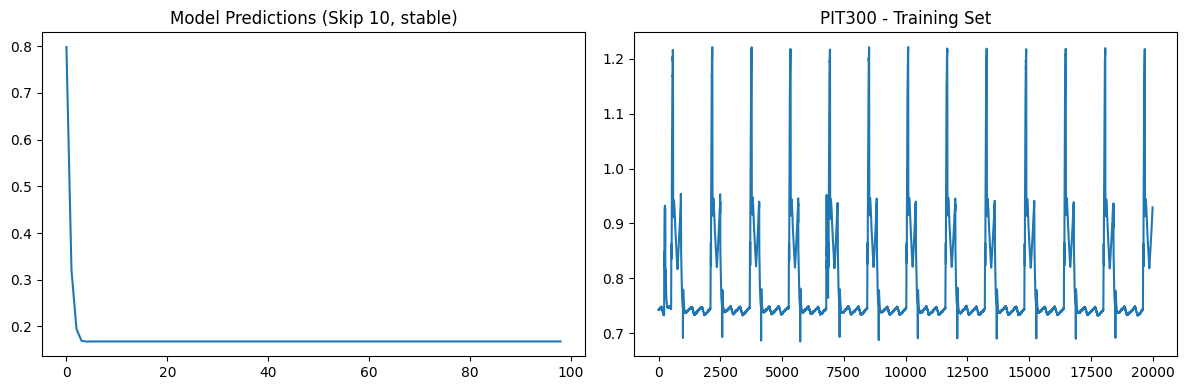

In [33]:
y1 = path[:2000]
y2 = pit300

plt.figure(figsize=(12, 4))

# Plotting the first set of points
plt.subplot(1, 2, 1)
plt.plot(y1, label='Model predictions')
plt.title('Model Predictions (Skip 10, stable)')

# Plotting the second set of points
plt.subplot(1, 2, 2)
plt.plot(y2[:20000], label='PIT300')
plt.title('PIT300 - Training Set')

# # Plotting both lines in the same plot
# plt.subplot(1, 2, 1)
# plt.plot(y1, label='Line 1')
# plt.plot(y2, label='Line 2')
# plt.legend()
# plt.title('Both Lines')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


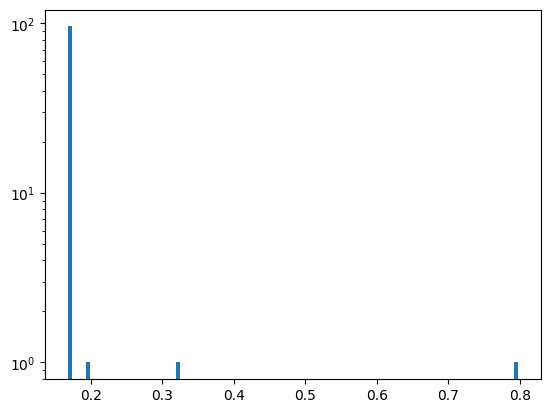

In [34]:
y1 = path
plt.hist(y1, bins=100, log=True)
plt.show()